# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
import api_keys

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(cities)

# Show Record Count
city_data_df.count()

0    587
dtype: int64

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city 
    city_url = f"{url}data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        
        #print(f"Status Code: {response.status_code}")
        city_weather = response.json()
        
       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get('coord', {}).get('lat')
        city_lng = city_weather.get('coord', {}).get('lon')
        city_max_temp = city_weather.get('main', {}).get('temp_max')
        city_humidity = city_weather.get('main', {}).get('humidity')
        city_clouds = city_weather.get('clouds', {}).get('all')
        city_wind = city_weather.get('wind', {}).get('speed')
        city_country = city_weather.get('sys', {}).get('country')
        city_date = city_weather.get('dt')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | midvagur
Processing Record 4 of Set 1 | palmer
Processing Record 5 of Set 1 | alofi
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | guerrero negro
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | lorengau
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | sucre
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | isafjordur
Processing Record 16 of Set 1 | kapa'a
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | crane
Processing Record 20 of Set 1 | port lincoln
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | dryden
Process

Processing Record 46 of Set 4 | malango
Processing Record 47 of Set 4 | carupano
Processing Record 48 of Set 4 | polyarnyy
Processing Record 49 of Set 4 | tselinnoye
Processing Record 0 of Set 5 | bondo
Processing Record 1 of Set 5 | qaqortoq
Processing Record 2 of Set 5 | codrington
Processing Record 3 of Set 5 | tobi village
Processing Record 4 of Set 5 | chonchi
Processing Record 5 of Set 5 | conception bay south
Processing Record 6 of Set 5 | great falls
Processing Record 7 of Set 5 | kuta
Processing Record 8 of Set 5 | broken hill
Processing Record 9 of Set 5 | lanzhou
Processing Record 10 of Set 5 | nogliki
Processing Record 11 of Set 5 | fort bragg
Processing Record 12 of Set 5 | colonia
Processing Record 13 of Set 5 | cold lake
Processing Record 14 of Set 5 | vila franca do campo
Processing Record 15 of Set 5 | tazovsky
Processing Record 16 of Set 5 | dunedin
Processing Record 17 of Set 5 | santo antonio do ica
Processing Record 18 of Set 5 | argo
Processing Record 19 of Set 5 

Processing Record 45 of Set 8 | zheleznogorsk-ilimskiy
Processing Record 46 of Set 8 | mermoz boabab
Processing Record 47 of Set 8 | souillac
Processing Record 48 of Set 8 | freetown
Processing Record 49 of Set 8 | bandon
Processing Record 0 of Set 9 | bardai
Processing Record 1 of Set 9 | san bernardo del viento
Processing Record 2 of Set 9 | beloyarskiy
Processing Record 3 of Set 9 | itoman
Processing Record 4 of Set 9 | teno
Processing Record 5 of Set 9 | guixi
Processing Record 6 of Set 9 | hihifo
Processing Record 7 of Set 9 | kifri
Processing Record 8 of Set 9 | hami
Processing Record 9 of Set 9 | olenino
Processing Record 10 of Set 9 | chernyshevskiy
Processing Record 11 of Set 9 | ilhabela
Processing Record 12 of Set 9 | taltal
Processing Record 13 of Set 9 | poltava
Processing Record 14 of Set 9 | ouellah
Processing Record 15 of Set 9 | susuman
Processing Record 16 of Set 9 | siniscola
Processing Record 17 of Set 9 | kulia village
Processing Record 18 of Set 9 | puerto baqueri

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df['Max Temp'].count()

587

In [18]:
# Display sample data
#city_data_df['Max Temp'] = pd.to_numeric(city_data_df['Max Temp'], errors='coerce')
#city_data_df['Max Temp (F)'] = 1.8 * (city_data_df['Max Temp'] - 273.15) + 32


city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,-315.31,94.0,100.0,9.53,RU,1.706465e+09
1,port-aux-francais,-49.3500,70.2167,-315.31,71.0,91.0,24.70,TF,1.706465e+09
2,midvagur,62.0511,-7.1939,-315.31,87.0,100.0,32.21,FO,1.706465e+09
3,palmer,42.1584,-72.3287,-315.31,86.0,100.0,6.91,US,1.706465e+09
4,alofi,-19.0595,-169.9187,-315.31,100.0,65.0,2.30,NU,1.706465e+09


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,-315.31,94.0,100.0,9.53,RU,1.706465e+09
1,port-aux-francais,-49.3500,70.2167,-315.31,71.0,91.0,24.70,TF,1.706465e+09
2,midvagur,62.0511,-7.1939,-315.31,87.0,100.0,32.21,FO,1.706465e+09
3,palmer,42.1584,-72.3287,-315.31,86.0,100.0,6.91,US,1.706465e+09
4,alofi,-19.0595,-169.9187,-315.31,100.0,65.0,2.30,NU,1.706465e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

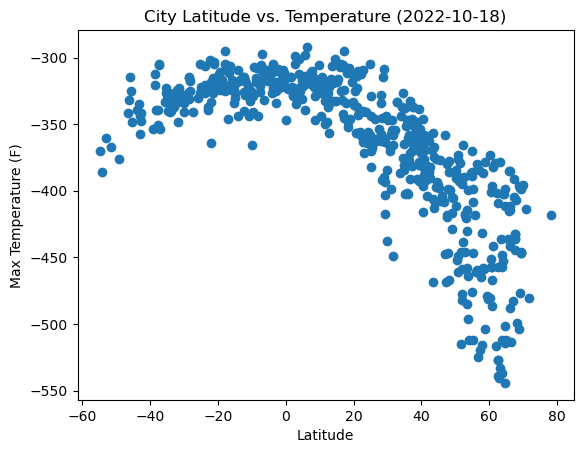

In [65]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,3])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')


# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

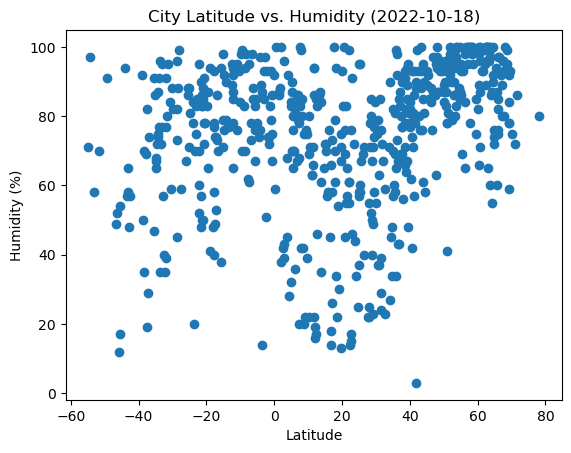

In [67]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,4])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

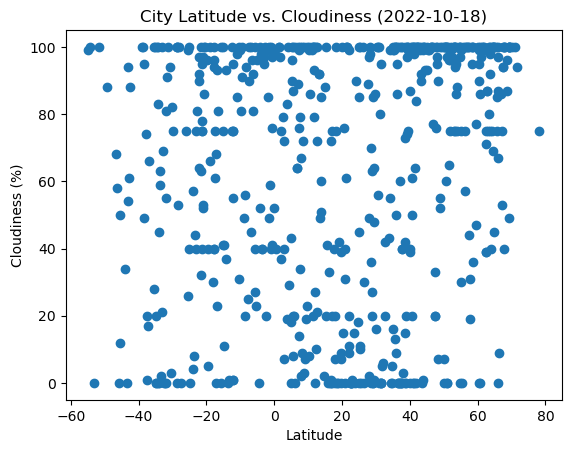

In [68]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,5])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

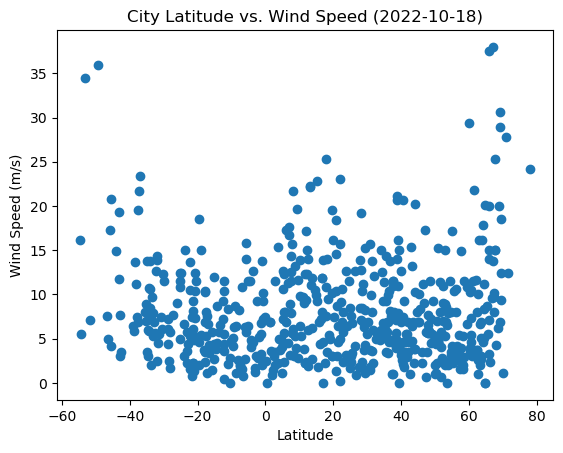

In [70]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots --use linregress (CHAGPT 2024, personal communication, January 26, 2024)

def linear_regression_plot(df, x_col, y_col, x_label, y_label, title):
    
    """
    Create a linear regression plot.

    Parameters:
    - df: Pandas DataFrame.
    - x_col: str, column name for the x-axis.
    - y_col: str, column name for the x-axis.
    - x_label: str, label for the x-axis.
    - y_label: str, label for the y-axis.
    - title: str, title of the plot.
    """
      
    #linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(df[x_col], df[y_col])
    
    #print slope, intercept, rvalue, standard error
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"R-value: {rvalue}")
    print(f"P-value: {pvalue}")
    print(f"Standard Error: {stderr}")
    
    #scatter plot
    plt.scatter(df[x_col], df[y_col], label='Data Points')                                                   
                                                          
    #plot linear regression line
    regression_line = slope * df[x_col] + intercept
    plt.plot(df[x_col], regression_line, color='red', label='Linear Regression')
    
    #labels, scatter plot title, legend
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    
    #print scatter plot
    plt.show()

#linear_regression_plot(city_data_df,'Lat', 'Max Temp', 'Latitude', "Temperature", 'Linear Regression: Latitude vs. Temperature')

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (F)
0,kachug,53.9606,105.8817,-511.780,100,75,1.99,RU,1706396616,-1380.8740
1,wailua homesteads,22.0669,-159.3780,-312.520,61,9,5.01,US,1706396616,-1022.2060
2,pekanbaru,0.5333,101.4500,-323.734,100,40,0.00,ID,1706396417,-1042.3912
4,kalajoki,64.2500,23.9500,-402.232,87,100,17.81,FI,1706396617,-1183.6876
5,pacific grove,36.6177,-121.9166,-332.896,67,0,4.61,US,1706396618,-1058.8828


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (F)
3,grytviken,-54.2811,-36.5092,-386.194,97,100,5.57,GS,1706396617,-1154.8192
8,margaret river,-33.9500,115.0667,-339.934,77,45,10.60,AU,1706396619,-1071.5512
9,waitangi,-43.9535,-176.5597,-339.412,94,34,14.92,NZ,1706396619,-1070.6116
11,namibe,-15.1961,12.1522,-324.346,79,41,2.68,AO,1706396619,-1043.4928
13,mount isa,-20.7333,139.5000,-315.004,78,96,10.36,AU,1706396620,-1026.6772


###  Temperature vs. Latitude Linear Regression Plot

Slope: -2.3573876971415886
Intercept: -293.658328696223
R-value: -0.8146065829578478
P-value: 6.720494013454981e-97
Standard Error: 0.08382031847606705


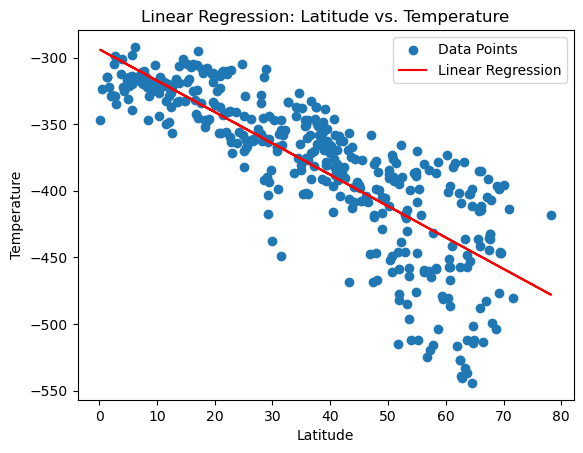

In [60]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat', 'Max Temp', 'Latitude', "Temperature", 
'Linear Regression: Latitude vs. Temperature')
plt.show()

Slope: 0.6229714746971414
Intercept: -311.83498992430043
R-value: 0.5514358615403526
Standard Error: 0.07144596702268456


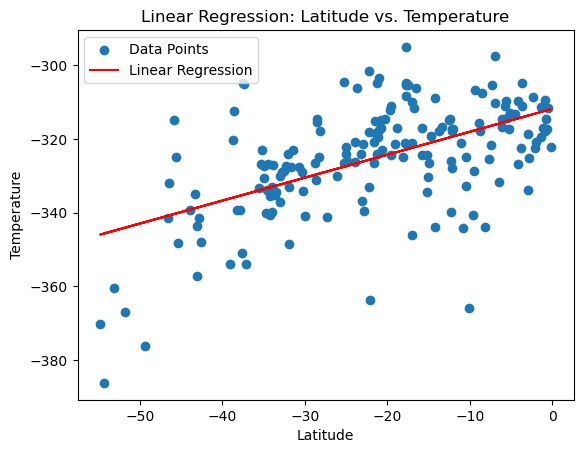

In [52]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat', 'Max Temp', 'Latitude', "Temperature", 
'Linear Regression: Latitude vs. Temperature')
plt.show()

**Discussion about the linear relationship:** The slope is interesti

### Humidity vs. Latitude Linear Regression Plot

Slope: 0.5095230503512295
Intercept: 55.68651817823985
R-value: 0.4549612643971813
Standard Error: 0.04980312876753189


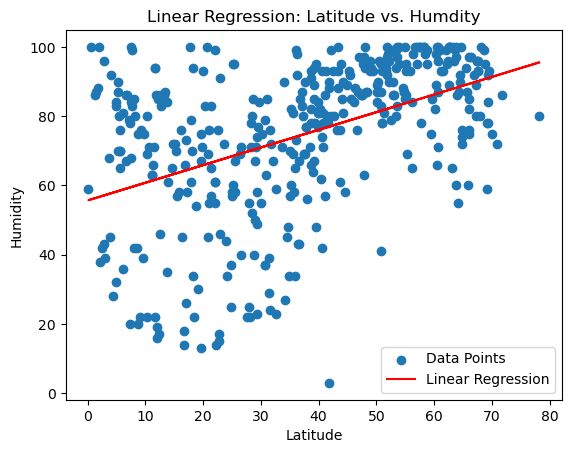

In [53]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat', 'Humidity', 'Latitude', 'Humidity', 'Linear Regression: Latitude vs. Humdity')

Slope: 0.4433703262215067
Intercept: 83.58024196811662
R-value: 0.3131284195444956
Standard Error: 0.10194381628725348


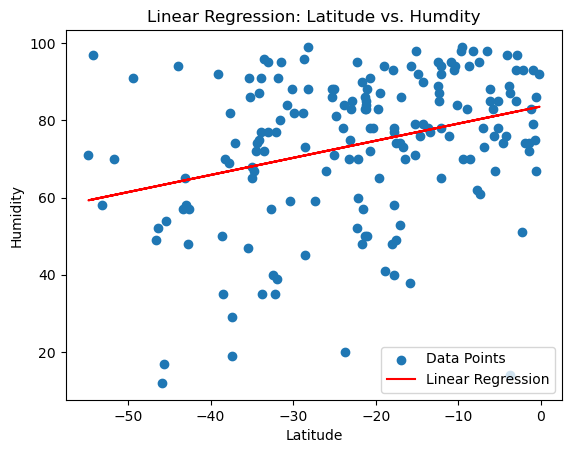

In [54]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat', 'Humidity', 'Latitude', 'Humidity', 'Linear Regression: Latitude vs. Humdity')

**Discussion about the linear relationship:** 

The slope is postive and therefore can suggest a positive correlation between latitude and humidity. In other words, an increase in latitude results in an increase in humidity. The R-value being low indicates that the correlation between Latitude and humidity is weak.

### Cloudiness vs. Latitude Linear Regression Plot

Slope: 0.5733654429305443
Intercept: 41.79620550861561
R-value: 0.29032747983090307
Standard Error: 0.09437351943294366


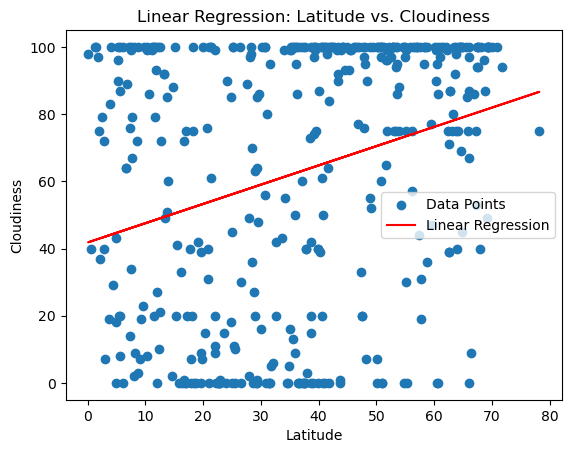

In [55]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness', 'Linear Regression: Latitude vs. Cloudiness')

Slope: 0.34238258128722904
Intercept: 68.92653156417828
R-value: 0.12898567189374494
Standard Error: 0.1995503216465938


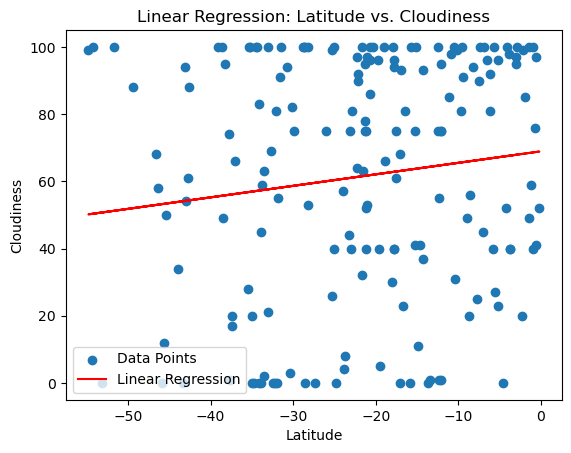

In [56]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat', 'Cloudiness', 'Latitude', 'Cloudiness', 'Linear Regression: Latitude vs. Cloudiness')

**Discussion about the linear relationship:** 

While the slope here indicates a positive correlation between Latitude and cloudiness, the R-value weakens that correlation. Only 12% of the change in cloudiness can be explained by a change in the Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

Slope: 0.019969078035625507
Intercept: 7.325469988052325
R-value: 0.0657550233001368
Standard Error: 0.015132684293636796


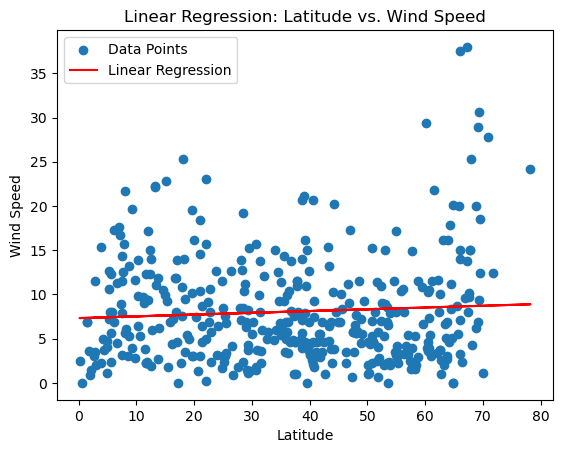

In [57]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat', 'Wind Speed', 'Latitude', 'Wind Speed', 'Linear Regression: Latitude vs. Wind Speed')

Slope: -0.1544894993522663
Intercept: 4.227338513998067
R-value: -0.3804097413508633
Standard Error: 0.028472723471199914


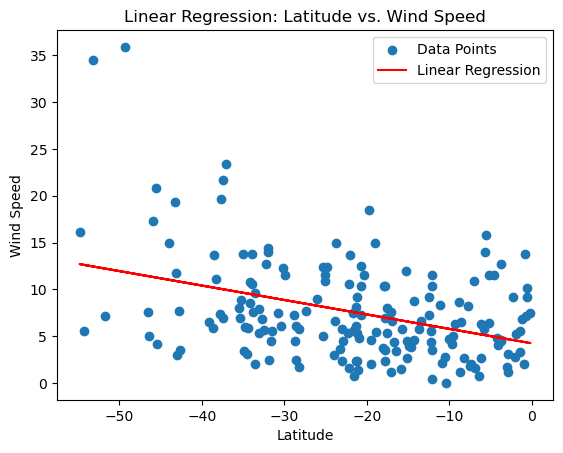

In [58]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat', 'Wind Speed', 'Latitude', 'Wind Speed', 'Linear Regression: Latitude vs. Wind Speed')


**Discussion about the linear relationship:** 

This suggests a negative correlation between wind and Latitude. The slope suggests that as latitude increases, wind speed decreases. The R-value as well indicates a negative correlation & at -0.38 it does not indicate a strong correlation between latitude and wind speed.